# generate 1D test data

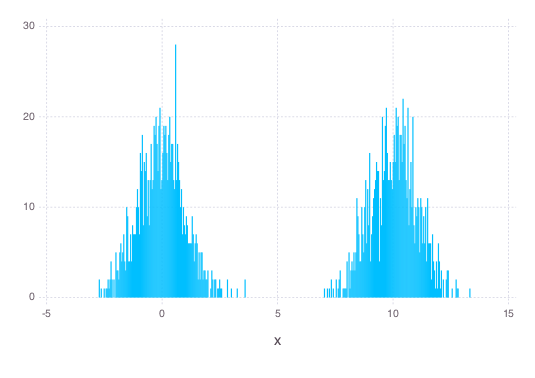

In [21]:
using Gadfly

N = 1000

X = randn(N)
Y = randn(N) + 10

plot(   layer(x = X, Geom.histogram),
layer(x = Y, Geom.histogram))

# construct SPN

In [242]:
#using SPN
using Distributions
include("../src/SPN.jl")

root = SPN.SumNode(0)

SPN.add!(root, SPN.UnivariateNode(fit(Normal, X)))
SPN.add!(root, SPN.UnivariateNode(fit(Normal, Y)))

SPN.normalize!(root);

SPN.order(root);

In [196]:
@time SPN.order(root);

elapsed time: 5.5281e-5 seconds (2176 bytes allocated)


In [243]:
SPN.llh(root, [5.0])
@time SPN.llh(root, [5.0]);

elapsed time: 0.000222931 seconds (5744 bytes allocated)


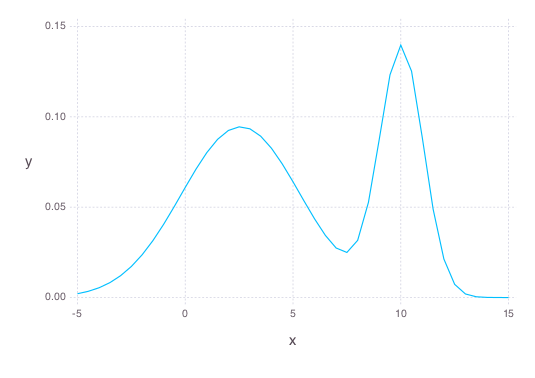

In [244]:
x = -5:0.5:15
p = zeros(length(x))

p = SPN.llh(root, [x])

plot( x = x, y = exp(p), Geom.line )

# generate 2D test data

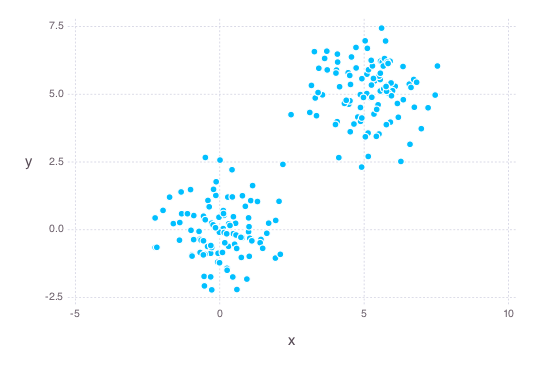

In [224]:
N = 100

X1 = randn(2, N)
X2 = 5 + randn(2, N)

X = cat(2, X1, X2)

plot(x = X[1,:], y = X[2,:], Geom.point)

In [247]:
root = SPN.SumNode(0)

pnode1 = SPN.ProductNode(1)

SPN.add!(pnode1, SPN.UnivariateNode(fit(Normal, X1[1,:]), 1))
SPN.add!(pnode1, SPN.UnivariateNode(fit(Normal, X1[2,:]), 2))

pnode2 = SPN.ProductNode(2)

SPN.add!(pnode2, SPN.UnivariateNode(fit(Normal, X2[1,:]), 1))
SPN.add!(pnode2, SPN.UnivariateNode(fit(Normal, X2[2,:]), 2))

SPN.add!(root, pnode1)
SPN.add!(root, pnode2)

In [248]:
x = [0.0 0.0; 0.3 0.5; 0.4 0.1]'

SPN.llh(root, x)

1x3 Array{Float64,2}:
 -3.12904  -3.28826  -3.19349

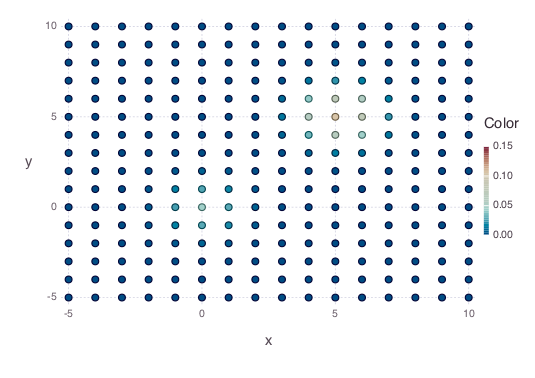

In [268]:
x = -5:10
X = zeros(2, length(x) ^ 2)

for (ii, i) in enumerate(x)
    for (jj, j) in enumerate(x)
        
        ix = ii - 1
        
        X[1,jj + ix*(length(x))] = i
        X[2,jj + ix*(length(x))] = j
    end
end

p = SPN.llh(root, X)

plot(x = X[1,:], y = X[2,:], color=exp(p), Geom.point)